# Scratch workspace

In [64]:
%matplotlib inline

import numpy as np # numerical calculations
import random # [psuedo-]random number generator

import matplotlib.pyplot as plt # plotting
import descartes # mapping (plotting)
from shapely.geometry import Point,Polygon, MultiPolygon, shape # mapping (plotting)

import geopandas as gpd # manipulating geospatial dataframes
import pandas as pd # manipulating typical dataframes

import re # regular expressions for text processing
from pathlib import Path # handling filepaths in python

pd.set_option('display.max_colwidth', None) # display full entries in each cell
pd.options.display.max_columns = 999 # display all cols

In [65]:
# define paths for relevant data directories
datapath = Path('../data/')

shapefiles_path = datapath / 'census TIGER shapefiles'
acs_path = datapath / 'american community survey'
asthma_path = datapath / 'asthma hospitalizations'
heart_path = datapath / 'heart attack hospitalizations'

# provide specific filenames for relevant files
mich_fname = shapefiles_path / 'tl_2020_26_cousub_michigan'
oreg_fname = shapefiles_path / 'tl_2020_41_cousub_oregon'
virg_fname = shapefiles_path / 'tl_2020_51_cousub_virginia'

acs_fname = acs_path / 'ACSDP5Y2019.DP05_2021-07-14T195323/ACSDP5Y2019.DP05_data_with_overlays_2021-07-14T195315.csv'

# create pandas/geopandas dataframes by reading-in filenames
mich_df = gpd.read_file(mich_fname / 'tl_2020_26_cousub.shp')
oreg_df = gpd.read_file(oreg_fname / 'tl_2020_41_cousub.shp')
virg_df = gpd.read_file(virg_fname / 'tl_2020_51_cousub.shp')

acs_df = pd.read_csv(acs_fname)

F:\Codebase\Anaconda3\envs\spatial\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,6,7,10,11,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,74,75,78,79,82,83,86,87,90,91,94,95,98,99,100,102,103,106,107,114,115,116,118,119,122,123,130,131,132,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,186,187,190,191,194,195,198,199,202,203,206,207,210,211,214,215,218,219,222,223,226,227,230,231,234,235,238,239,242,243,246,247,250,251,252,254,255,258,259,262,263,266,267,270,271,274,275,278,279,280,282,283,286,287,290,291,294,295,298,299,302,303,306,307,310,311,314,315,318,319,322,323,326,327,330,331,334,335,338,339,342,343,346,347,348,350,351,354,355) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---

### Initial data cleaning procedures

After noticing the water in the Michigan map, we decided to clean the data to remove areas where the "land area" variable is 0.

In [66]:
# remove counties where land area (ALAND) is greater than zero
mich_df = mich_df[ mich_df['ALAND']>0 ]
oreg_df = oreg_df[ oreg_df['ALAND']>0 ]
virg_df = virg_df[ virg_df['ALAND']>0 ]

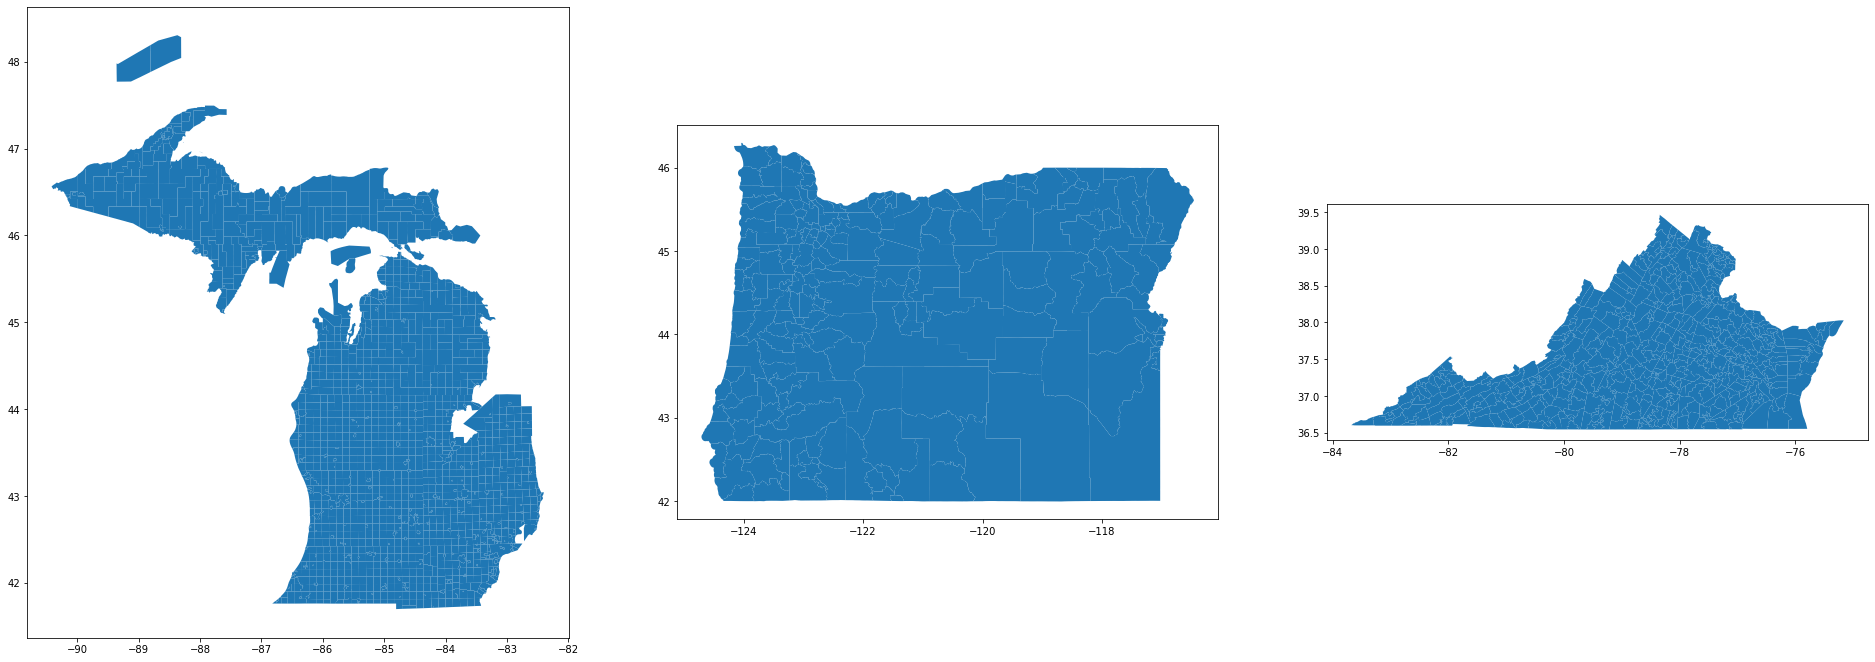

In [126]:
# plot MI, OR, VA counties
fig, axs = plt.subplots(1, 3, figsize = (33,99))
mich_df.plot(ax=axs[0])
oreg_df.plot(ax=axs[1])
virg_df.plot(ax=axs[2])
plt.show()

---

### Working with American Community Survey (ACS) data

As a potential "outcome" measure of systemic racism and discrimination (SRD), we wanted to try to map out the geographical segregation (not necessarily due to current policy, but usually very informed of prior policy) in each of our areas of interest. As such, we decided to geographically plot the percent total population race ("Black or African American") in our areas of interest. We started by examing our data heading(s).

In [73]:
# print first 2 rows
acs_df.iloc[[0]]

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,DP05_0003E,DP05_0003M,DP05_0003PE,DP05_0003PM,DP05_0004E,DP05_0004M,DP05_0004PE,DP05_0004PM,DP05_0005E,DP05_0005M,DP05_0005PE,DP05_0005PM,DP05_0006E,DP05_0006M,DP05_0006PE,DP05_0006PM,DP05_0007E,DP05_0007M,DP05_0007PE,DP05_0007PM,DP05_0008E,DP05_0008M,DP05_0008PE,DP05_0008PM,DP05_0009E,DP05_0009M,DP05_0009PE,DP05_0009PM,DP05_0010E,DP05_0010M,DP05_0010PE,DP05_0010PM,DP05_0011E,DP05_0011M,DP05_0011PE,DP05_0011PM,DP05_0012E,DP05_0012M,DP05_0012PE,DP05_0012PM,DP05_0013E,DP05_0013M,DP05_0013PE,DP05_0013PM,DP05_0014E,DP05_0014M,DP05_0014PE,DP05_0014PM,DP05_0015E,DP05_0015M,DP05_0015PE,DP05_0015PM,DP05_0016E,DP05_0016M,DP05_0016PE,DP05_0016PM,DP05_0017E,DP05_0017M,DP05_0017PE,DP05_0017PM,DP05_0018E,DP05_0018M,DP05_0018PE,DP05_0018PM,DP05_0019E,DP05_0019M,DP05_0019PE,DP05_0019PM,DP05_0020E,DP05_0020M,DP05_0020PE,DP05_0020PM,DP05_0021E,DP05_0021M,DP05_0021PE,DP05_0021PM,DP05_0022E,DP05_0022M,DP05_0022PE,DP05_0022PM,DP05_0023E,DP05_0023M,DP05_0023PE,DP05_0023PM,DP05_0024E,DP05_0024M,DP05_0024PE,DP05_0024PM,DP05_0025E,DP05_0025M,DP05_0025PE,DP05_0025PM,DP05_0026E,DP05_0026M,DP05_0026PE,DP05_0026PM,DP05_0027E,DP05_0027M,DP05_0027PE,DP05_0027PM,DP05_0028E,DP05_0028M,DP05_0028PE,DP05_0028PM,DP05_0029E,DP05_0029M,DP05_0029PE,DP05_0029PM,DP05_0030E,DP05_0030M,DP05_0030PE,DP05_0030PM,DP05_0031E,DP05_0031M,DP05_0031PE,DP05_0031PM,DP05_0032E,DP05_0032M,DP05_0032PE,DP05_0032PM,DP05_0033E,DP05_0033M,DP05_0033PE,DP05_0033PM,DP05_0034E,DP05_0034M,DP05_0034PE,DP05_0034PM,DP05_0035E,DP05_0035M,DP05_0035PE,DP05_0035PM,DP05_0036E,DP05_0036M,DP05_0036PE,DP05_0036PM,DP05_0037E,DP05_0037M,DP05_0037PE,DP05_0037PM,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,DP05_0039E,DP05_0039M,DP05_0039PE,DP05_0039PM,DP05_0040E,DP05_0040M,DP05_0040PE,DP05_0040PM,DP05_0041E,DP05_0041M,DP05_0041PE,DP05_0041PM,DP05_0042E,DP05_0042M,DP05_0042PE,DP05_0042PM,DP05_0043E,DP05_0043M,DP05_0043PE,DP05_0043PM,DP05_0044E,DP05_0044M,DP05_0044PE,DP05_0044PM,DP05_0045E,DP05_0045M,DP05_0045PE,DP05_0045PM,DP05_0046E,DP05_0046M,DP05_0046PE,DP05_0046PM,DP05_0047E,DP05_0047M,DP05_0047PE,DP05_0047PM,DP05_0048E,DP05_0048M,DP05_0048PE,DP05_0048PM,DP05_0049E,DP05_0049M,DP05_0049PE,DP05_0049PM,DP05_0050E,DP05_0050M,DP05_0050PE,DP05_0050PM,DP05_0051E,DP05_0051M,DP05_0051PE,DP05_0051PM,DP05_0052E,DP05_0052M,DP05_0052PE,DP05_0052PM,DP05_0053E,DP05_0053M,DP05_0053PE,DP05_0053PM,DP05_0054E,DP05_0054M,DP05_0054PE,DP05_0054PM,DP05_0055E,DP05_0055M,DP05_0055PE,DP05_0055PM,DP05_0056E,DP05_0056M,DP05_0056PE,DP05_0056PM,DP05_0057E,DP05_0057M,DP05_0057PE,DP05_0057PM,DP05_0058E,DP05_0058M,DP05_0058PE,DP05_0058PM,DP05_0059E,DP05_0059M,DP05_0059PE,DP05_0059PM,DP05_0060E,DP05_0060M,DP05_0060PE,DP05_0060PM,DP05_0061E,DP05_0061M,DP05_0061PE,DP05_0061PM,DP05_0062E,DP05_0062M,DP05_0062PE,DP05_0062PM,DP05_0063E,DP05_0063M,DP05_0063PE,DP05_0063PM,DP05_0064E,DP05_0064M,DP05_0064PE,DP05_0064PM,DP05_0065E,DP05_0065M,DP05_0065PE,DP05_0065PM,DP05_0066E,DP05_0066M,DP05_0066PE,DP05_0066PM,DP05_0067E,DP05_0067M,DP05_0067PE,DP05_0067PM,DP05_0068E,DP05_0068M,DP05_0068PE,DP05_0068PM,DP05_0069E,DP05_0069M,DP05_0069PE,DP05_0069PM,DP05_0070E,DP05_0070M,DP05_0070PE,DP05_0070PM,DP05_0071E,DP05_0071M,DP05_0071PE,DP05_0071PM,DP05_0072E,DP05_0072M,DP05_0072PE,DP05_0072PM,DP05_0073E,DP05_0073M,DP05_0073PE,DP05_0073PM,DP05_0074E,DP05_0074M,DP05_0074PE,DP05_0074PM,DP05_0075E,DP05_0075M,DP05_0075PE,DP05_0075PM,DP05_0076E,DP05_0076M,DP05_0076PE,DP05_0076PM,DP05_0077E,DP05_0077M,DP05_0077PE,DP05_0077PM,DP05_0078E,DP05_0078M,DP05_0078PE,DP05_0078PM,DP05_0079E,DP05_0079M,DP05_0079PE,DP05_0079PM,DP05_0080E,DP05_0080M,DP05_0080PE,DP05_0080PM,DP05_0081E,DP05_0081M,DP05_0081PE,DP05_0081PM,DP05_0082E,DP05_0082M,DP05_0082PE,DP05_0082PM,DP05_0083E,DP05_0083M,DP05_0083PE,DP05_0083PM,DP05_0084E,DP05_0084M,DP05_0084PE,DP05_0084PM,DP05_0085E,DP05_0085M,DP05_0085PE,DP05_0085PM,DP05_0086E,DP05_0086M,DP05_0086PE,DP05_0086PM,DP05_0087E,DP05_0087M,DP05_0087

As we can see, based on the first 2 rows of our dataset, we have 2 sets of headings. Not to worry! We can use the more informative names (in the first row) to identify the most relevant header codes. In our case, it looks like `DP05_0038PE` corresponds to the `Percent!!RACE!!Total population!!One race!!Black or African American` statistic we want, so we can create a new dataframe with just the variables we want.

In [74]:
# create new df w/ just 'GEO_ID', 'DP05_0038PE'
segr_df = acs_df[['GEO_ID', 'DP05_0038PE']][1:]

We now must perform some feature engineering to create variables that meet our specific needs from the variables available currently. We also will rename `DP05_0038PE` with a more informative name.

In [108]:
# create new df column 'Pct-Race-Black-AfAm-Total' as a more informative name for 'DP05_0038PE'
segr_df['Pct-Race-Black-AfAm-Total'] = pd.to_numeric(segr_df['DP05_0038PE'], errors='coerce')

# create row-iterator for our dataframe
row_indices = range(segr_df.shape[0]) # range of 0 to nrows

# create new df column 'county' to hold county name split via exp (more info on split(): https://docs.python.org/3.8/library/re.html#re.split)
segr_df['GEOID'] = [segr_df['GEO_ID'].iloc[i][9:] for i in row_indices] # only keep cell entry before exp

Now that we're done with our feature engineering, we want to select only the relevant columns we can merge into our prior dataframe.

In [116]:
# create new segr_merge dataframe to keep variables we want
segr_merge = segr_df[['GEOID', 'Pct-Race-Black-AfAm-Total']]

### Merging ACS data with our existing geopandas dataframes

First, we must identify the relevant variables to merge with from our geopandas shapefile-derived dataframes. (All 3 states' dataframes use the same variables.) Since we used census data, our prior creation of our ACS `GEOID` variable (from the initial `GEO_ID` variable) gives us our way to merge with `GEOID` from the shapefiles.

In [144]:
# merge shapefile geopandas dataframes w/ ACS pandas dataframe on common 'GEOID' variable
mich_df_merged = pd.merge(left=mich_df, right=segr_merge, on='GEOID')
oreg_df_merged = pd.merge(left=oreg_df, right=segr_merge, on='GEOID')
virg_df_merged = pd.merge(left=virg_df, right=segr_merge, on='GEOID')

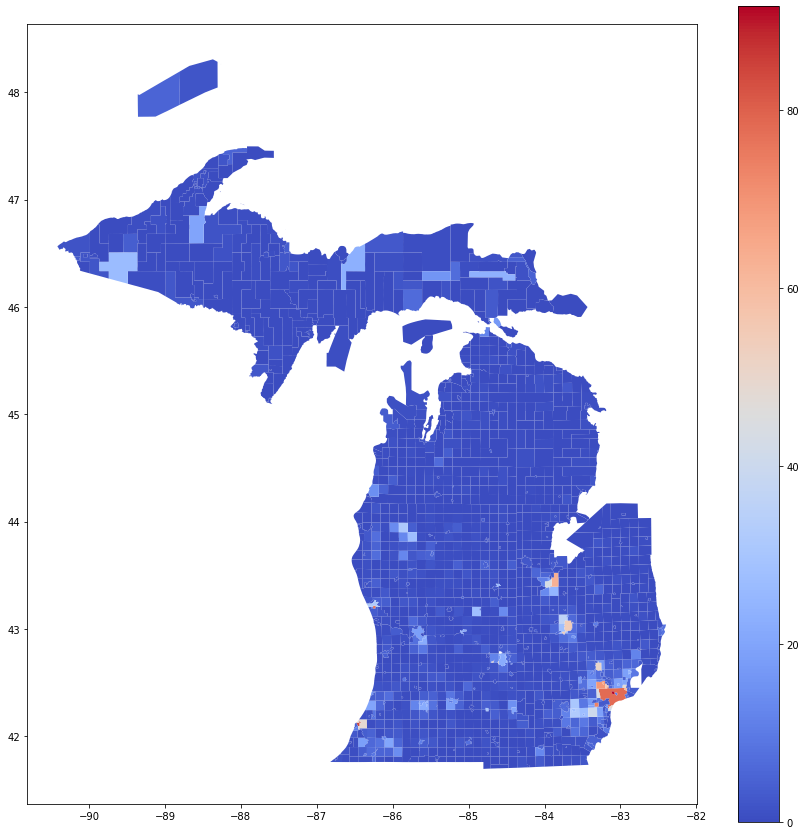

In [150]:
# plot michigan data by county
fig, ax = plt.subplots(figsize = (15,15))
mich_df.plot(ax=ax, color='white', edgecolor='white')
mich_df_merged.plot(ax=ax, column = 'Pct-Race-Black-AfAm-Total', legend=True, cmap='coolwarm')
plt.show()

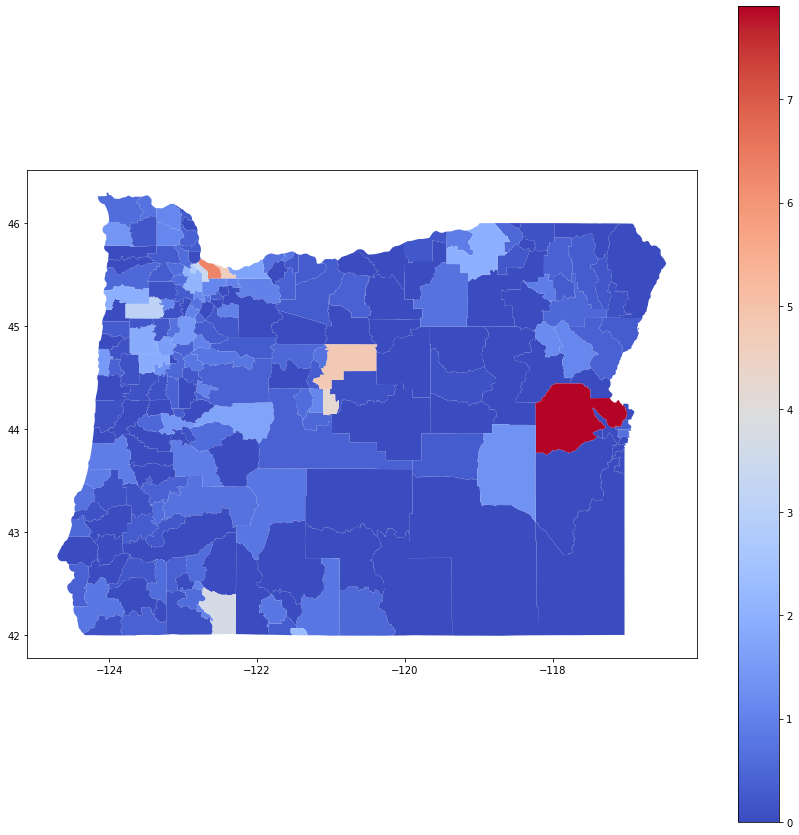

In [151]:
# plot oregon data by county
fig, ax = plt.subplots(figsize = (15,15))
oreg_df.plot(ax=ax, color='white', edgecolor='white')
oreg_df_merged.plot(ax=ax, column = 'Pct-Race-Black-AfAm-Total', legend=True, cmap='coolwarm')
plt.show()

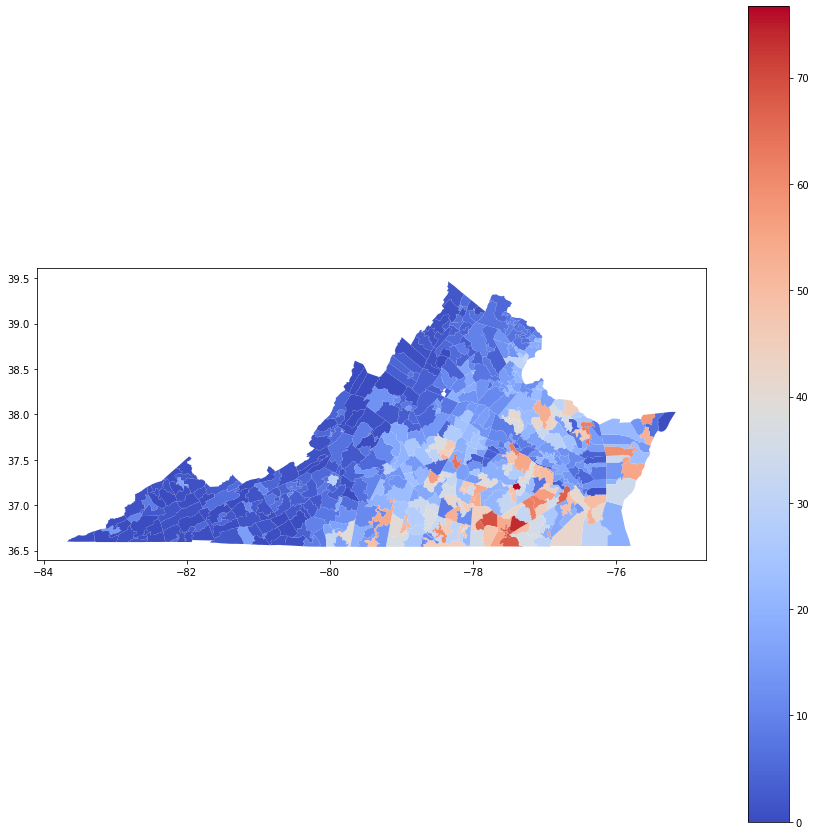

In [152]:
# plot virginia data by county
fig, ax = plt.subplots(figsize = (15,15))
virg_df.plot(ax=ax, color='white', edgecolor='white')
virg_df_merged.plot(ax=ax, column = 'Pct-Race-Black-AfAm-Total', legend=True, cmap='coolwarm')
plt.show()